In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('dark')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

In [37]:
h_names=['class', 'cap-shape', 'Cap-surface','cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size','gill-color', 'stalk-shape', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

filename = 'mushrooms_data.txt'

mushroom= pd.read_csv(filename,names=h_names)

In [38]:
mushroom.drop(columns=['veil-type'], axis=1, inplace=True)


In [39]:
def Label_enc(feature):
    LE = LabelEncoder()
    LE.fit(feature)
    print(feature.name,LE.classes_)
    return LE.transform(feature)
for col in mushroom.columns:
    mushroom[str(col)] = Label_enc(mushroom[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
Cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-surface-above-ring ['f' 'k' 's']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w']
stalk-color-below ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-color ['n' 'o' 'w']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [40]:
x = mushroom.drop(columns=['odor'], axis=1)
y = mushroom['odor']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [42]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_predict)
print("Random Forest Classifier Accuracy Value: {:.2f}".format(accuracy))

Random Forest Classifier Accuracy Value: 0.81


In [43]:
confmat1 = confusion_matrix(y_predict, y_test)
confmat1

array([[ 16,   0,   0,  99,   0,   0,   0,   0],
       [  0,  49,   0,   0,   0,   0,   0,   0],
       [  0,   0, 488,   0,   0,   0,  22,  31],
       [116,   0,   0,  20,   0,   0,   0,   0],
       [  0,   0,   0,   0, 919,   0,   0,   0],
       [  0,   0,   0,   0,   0,  63,   0,   0],
       [  0,   0,  25,   0,   0,   0,   7,  20],
       [  0,   0,  35,   0,   0,   0,  29,  11]], dtype=int64)

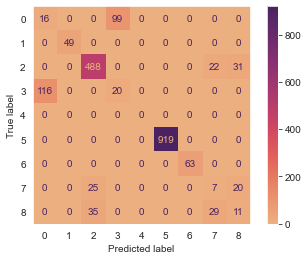

In [44]:
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_predict,y_test,labels=model.classes_),
                              display_labels=model.classes_)
cm.plot(cmap="flare")

In [45]:
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_predict)))

Confusion matrix Accuracy is: 0.8066666666666666


In [46]:
#with removing less correlation data

X = mushroom.drop(['odor','gill-color','bruises','class','cap-color','ring-type','bruises'],axis=1)
y = mushroom['odor']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4,random_state=42)

In [47]:
model_1 = RandomForestClassifier(max_depth=10, random_state=0)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
accuracy_score(y_test,y_pred)
#we can see that we  get better score.


0.8392307692307692

<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>


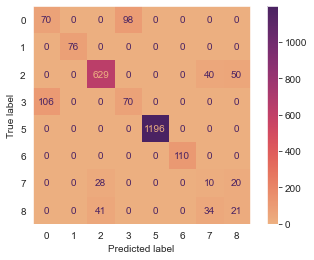

In [48]:

cm =metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=model_1.classes_),
                              display_labels=model_1.classes_)
df_cm1 = pd.DataFrame(z)

cm.plot(cmap="flare")

print(type(cm))

In [35]:
print('Confusion matrix Accuracy is: {}'.format(metrics.accuracy_score(y_test, y_pred)))


Confusion matrix Accuracy is: 0.8392307692307692
